# 機器學習流程
# 1.讀取資料
# 2.數據清洗
# 3.特徵工程
# 4.相關性分析
# 5.訓練模型

# 1.讀取資料

In [107]:
# 環境準備，使用 Python NumPy、Pandas、seaborn
import pandas as pd
import numpy as np
import seaborn as sb

In [108]:
# train資料來源
df_train_url = 'https://raw.githubusercontent.com/micrighost/KaggleNotes_DigitRecognizer/main/digit-recognizer/train.csv'

df_train = pd.read_csv(df_train_url)

df_train.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 2.數據清洗

In [109]:
# 第一欄所代表的資料為訓練資料的對應數字，所以要先將其分割出來，並且將測試資料從 DataFrame 轉為 numpy.Array。
# 從資料中提取x_train(特徵)和y_train(目標)

# 行從0位置開始取直到最後(空白代表到底)，列從1位置開始取值到最後
x_train = df_train.values[0:,1:]

# 行從0位置開始取直到最後(空白代表到底)，列只取第0位置
y_train = df_train.values[0:,0]

In [110]:
# 查看特徵的形狀
x_train.shape

# 可以看到有42000行，每行784列，代表是個28*28的圖(才會等於784)

(42000, 784)

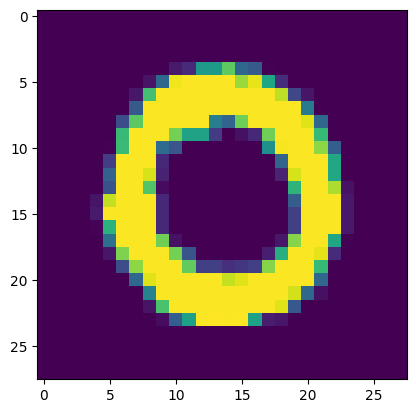

In [111]:
# 印出圖片x_train[1]，也就是第2張圖

import matplotlib.pyplot as plt
# .reshape()是改變數組的方法，用於改變數組的形狀
# 這裡把一維數組的784個，轉換為28*28的二維數組

# 被轉換後:
# x_train[1]為28個有28個數字的一陣列
# 1,2,3...28
# 2
# 3
# .
# .
# 28

plt.imshow(x_train[1].reshape((28,28)))

In [112]:
# 用.reshape()改變數組拉成3維
x_train = x_train.reshape((42000,28,28))

x_train.shape

(42000, 28, 28)

# 3.特徵工程 4.相關性分析

In [113]:
# 傳統機器學習：利用特徵工程(feature engineering)，人為對資料進行提煉清洗；
# 深度學習：利用表示學習(representation learning)，機器學習模型本身對資料進行特徵精煉

# 5.訓練模型

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


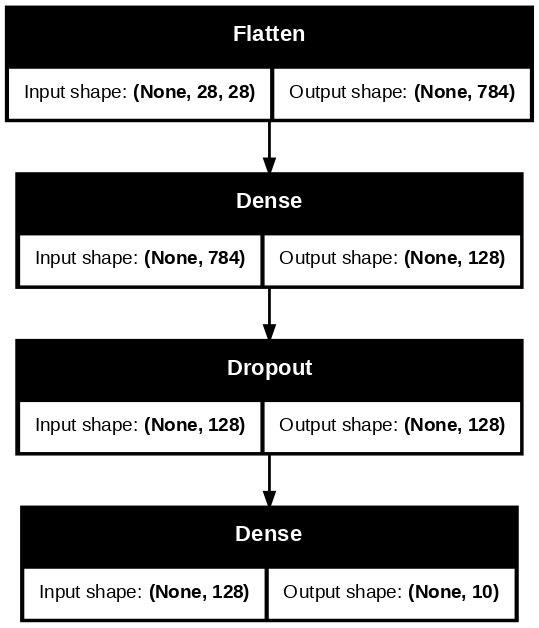

In [114]:
from tensorflow import keras
from keras import layers

# 用Sequential建立模型
ANN = keras.Sequential(name='ClassificationANN')

# 將寬、高各28個像素的圖轉成一維陣列 28 x 28 = 784個特徵
# 如果原本就是一維陣列則這樣寫: ANN.add(layers.Flatten(input_shape=(784,)))
ANN.add(layers.Flatten(input_shape=(28, 28)))

# input為784個特徵，output 為128個神經元，即128條迴歸線。
# 用relu來收斂
ANN.add(layers.Dense(128, activation='relu'))

# 在訓練週期隨機丟棄20%的神經元，藉以矯正過度擬合的現象。
# Dropout 是一種對抗過擬合的正則化方法，以一定的機率丟棄隱藏層神經元來對抗過擬合
ANN.add(layers.Dropout(0.2))

# 輸出10個神經元，透過 softmax activation function，轉成機率，即0~9的預測機率，選擇最大機率者為預測值。
ANN.add(layers.Dense(10, activation='softmax'))

# 顯示模型圖
keras.utils.plot_model(ANN,show_shapes=True,dpi=100)# show_shapes:是否顯示形狀資訊 dpi:圖示大小


# # 打印出模型的信息
# ANN.summary()

In [115]:
# model每層定義好後需要經過compile
# optimizer最佳化工具為adam
# 方法為loss的sparse_categorical_crossentropy
ANN.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



# 訓練網絡用fix
# x_train去跟y_train比，迭代五次
# verbose：日誌顯示，0為不在標準輸出流輸出日誌訊息，1為輸出進度條記錄，2為每個epoch輸出一行記錄
# validation_split：0~1之間的浮點數，用來指定訓練集的一定比例資料作為驗證集。驗證集將不參與訓練，並在每個epoch結束後測試的模型的指標，如損失函數、精確度等。
# 請注意:
# 模型的fit函數有兩個參數，shuffle用於將資料打亂，validation_split用於在沒有提供驗證集的時候，以一定比例從訓練集中取出一部分作為驗證集
# 這裡有個陷阱是，程式是先執行validation_split，再執行shuffle的，所以會出現這種情況：
# 假如你的訓練集是有序的，比方說正樣本在前負樣本在後，又設定了validation_split，那麼你的驗證集中很可能將全部是負樣本
# 同樣的，這個東西不會有任何錯誤報出來，因為Keras不可能知道你的數據有沒有經過shuffle，保險起見如果你的數據是沒shuffle過的，最好手動shuffle一下
history = ANN.fit(x_train, y_train,validation_split=0.25,epochs=5)

Epoch 1/5
985/985 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6845 - loss: 11.7564 - val_accuracy: 0.8324 - val_loss: 0.7416
Epoch 2/5
985/985 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8036 - loss: 0.7785 - val_accuracy: 0.8770 - val_loss: 0.5426
Epoch 3/5
985/985 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8503 - loss: 0.5764 - val_accuracy: 0.8905 - val_loss: 0.4676
Epoch 4/5
985/985 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8668 - loss: 0.4992 - val_accuracy: 0.8935 - val_loss: 0.4423
Epoch 5/5
985/985 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8806 - loss: 0.4398 - val_accuracy: 0.9101 - val_loss: 0.3702


In [116]:
# History.history 屬性是一個記錄了連續迭代的訓練/驗證（如果存在）損失值和評估值的字典
history.history

{'accuracy': [0.7224127054214478,
  0.818063497543335,
  0.851111114025116,
  0.867555558681488,
  0.8819364905357361],
 'loss': [3.7611165046691895,
  0.7242356538772583,
  0.5664570927619934,
  0.49623143672943115,
  0.446991503238678],
 'val_accuracy': [0.8323809504508972,
  0.877047598361969,
  0.8904761672019958,
  0.8935238122940063,
  0.91009521484375],
 'val_loss': [0.7415692806243896,
  0.542640745639801,
  0.46756649017333984,
  0.4422532021999359,
  0.37015098333358765]}

In [117]:
# evaluate() 用於評估已經過訓練的模型。返回模型的損失值&準確率值
# 損失函數即實際值和預測值的殘差所以越小越好
# 使用 return_dict=True 參數，傳回的結果將是一個字典，其中鍵是名稱，值是對應的數值
# 使用 return_dict=False（預設情況），則傳回一個標量或標量清單(沒有名稱)
ann_evaluate = ANN.evaluate(x_train, y_train, return_dict=True, verbose=2) # verbose = 2 為每個epoch輸出一行記錄

print("Accuracy:", ann_evaluate["accuracy"])
print("Loss:", ann_evaluate["loss"])

1313/1313 - 2s - 2ms/step - accuracy: 0.9175 - loss: 0.3030
Accuracy: 0.9174523949623108
Loss: 0.3030059039592743


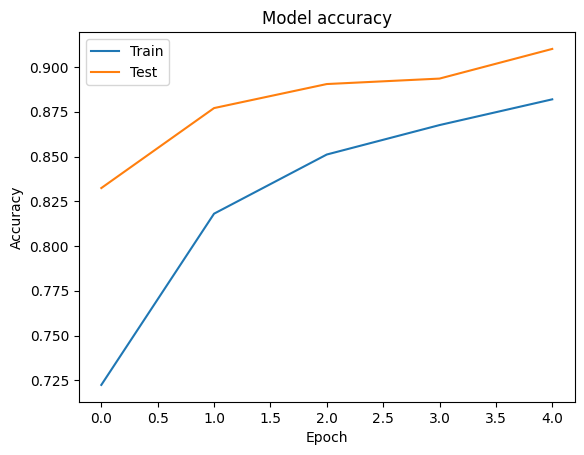

In [118]:
# 繪製訓練 & 驗證的準確率值
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

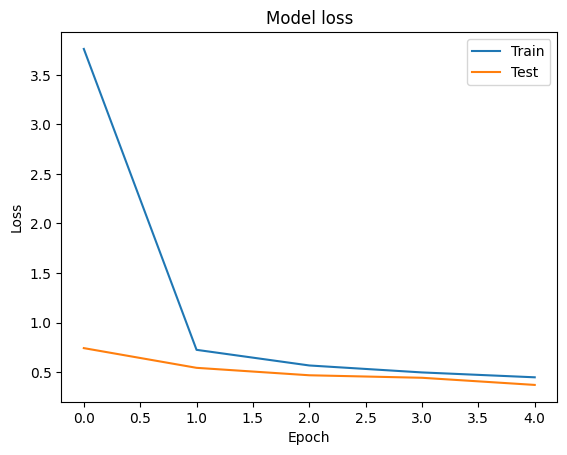

In [119]:
# 繪製訓練 & 驗證的損失值
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

# 1.讀取資料

In [120]:
# test資料來源
df_test_url = 'https://raw.githubusercontent.com/micrighost/KaggleNotes_DigitRecognizer/main/digit-recognizer/test.csv'

df_test = pd.read_csv(df_test_url)

df_test.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 2.數據清洗

In [121]:
# 第一欄所代表的資料為訓練資料的對應數字，所以要先將其分割出來，並且將測試資料從 DataFrame 轉為 numpy.Array。
# 從資料中提取x_test(特徵)和y_test(目標)

# 行從0位置開始取直到最後(空白代表到底)，列從頭位置開始取值到最後
x_test = df_test.values[0:,:]


In [122]:
# 查看特徵的形狀
x_test.shape

# 可以看到有42000行，每行784列，代表是個28*28的圖(才會等於784)

(28000, 784)

In [123]:
# 用.reshape()改變數組拉成3維
x_test = x_test.reshape((28000,28,28))

x_test.shape

(28000, 28, 28)

# 3.特徵工程 4.相關性分析

In [124]:
# 傳統機器學習：利用特徵工程(feature engineering)，人為對資料進行提煉清洗；
# 深度學習：利用表示學習(representation learning)，機器學習模型本身對資料進行特徵精煉

# 5.訓練模型

In [125]:
import numpy as np

predics = ANN.predict(x_test)
# 抓到x_test的第[]張照片的比對結果，並把結果印出至小數點第3位
print(np.round(predics[0],3))

# 用shape顯示矩陣形狀,可以看到預測結果為28000組答案，每組答案代表一個預測結果，裡面包含各數字的可能性
predics.shape

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


(28000, 10)

In [126]:
# 用np.argmax把[]中的最適結果印出來
predics = np.argmax(predics,axis=1)

print('prelabel:',predics[0])

prelabel: 2


In [127]:
# 用shape顯示矩陣形狀,可以看到預測結果為28000組答案，每組答案代表一個預測結果
predics.shape

(28000,)

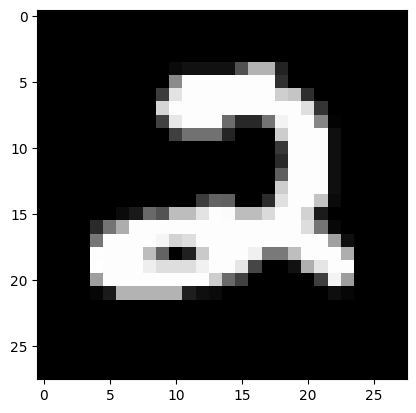

In [128]:
# 以灰階印出[]照片，用來看看訓練結果如何(個視圖之間最好不要同時打印，否則會有吃圖bug)
plt.imshow(x_test[0],cmap='gray')

In [129]:
# 導出預測結果
test_ann_predics = pd.DataFrame()
test_ann_predics['ImageId'] = list(range(1, len(predics) + 1))
test_ann_predics['Label'] = predics

# 顯示預測結果
test_ann_predics

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,3
4,5,2
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [130]:
# 將預測結果導出為csv文件
test_ann_predics.to_csv('./DigitRecognizer_ANN.csv',index=False)